In [1]:
#Installing required libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
#Import libraries
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Analysis of Items puchased in a Supermarket

In [5]:
#Reading data
my_filepath = "/home/jupyter-user/supermarket_data_analysis_and_visualization_dataset/supermarket-data-analysis-and-visualization-dataset/Groceries_dataset.csv"
my_data = pd.read_csv(my_filepath)
my_data

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


## Question 1: What Product Do People Buy The Most

### Task 1: Create A DataFrame for the most commonly bought products and their counts

In [6]:
uniques = my_data["itemDescription"].unique()

count_data=[]
for data in uniques:
    item = str(data)
    filt = my_data["itemDescription"] == item
    new=my_data.loc[filt]
    x=new["itemDescription"].count()
    count_data.append(x)

In [7]:
data = {'itemDescription':  uniques,
        'Count Of Items': count_data
        }
count_df = pd.DataFrame (data, columns = ['itemDescription','Count Of Items'])
count_df


,itemDescription,Count Of Items
0,tropical fruit,1032
1,whole milk,2502
2,pip fruit,744
3,other vegetables,1898
4,rolls/buns,1716
...,...,...
162,pudding powder,17
163,ready soups,15
164,make up remover,5
165,toilet cleaner,5


### Task 2: Get The Top 20 Values

In [8]:
truncated_count_df = count_df.nlargest(20,['Count Of Items'])

### Task 3: Plotting The Histogram

Text(0.5, 1.0, 'Most Commonly Bought Items')

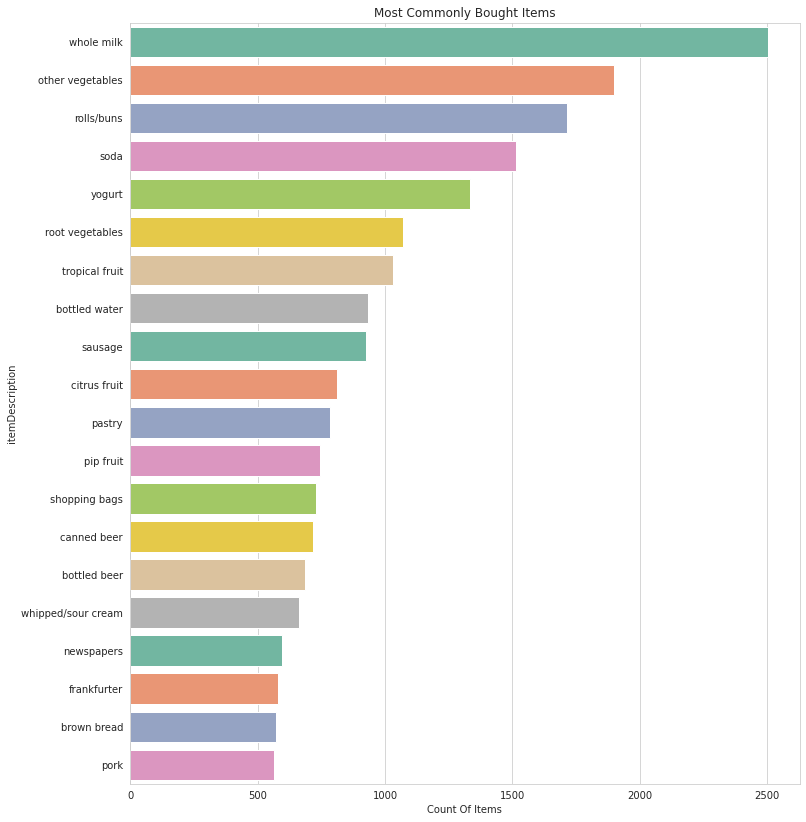

In [9]:
# Create a plot
plt.figure(figsize=(12,14))
sns.set_style("whitegrid")
chart = sns.barplot(y=truncated_count_df["itemDescription"], x=truncated_count_df['Count Of Items'],palette='Set2', data=truncated_count_df) # Your code here
plt.title("Most Commonly Bought Items")
#chart.set_yticklabels(chart.get_yticklabels(), rotation=90)
# sns.set_context("talk", font_scale=1.4)

## Question 2: Is the Volume of sales Healthy 

### Task 1: Create a Column For The Years, Months and Weeks

In [10]:
my_data.Date = pd.to_datetime(my_data.Date) 


In [11]:
my_data['Year'] = my_data.Date.apply(lambda x : x.year)
my_data['Month'] = my_data.Date.apply(lambda x : x.month)
my_data['Days of Week'] = my_data.Date.apply(lambda x : x.dayofweek)
my_data

,Member_number,Date,itemDescription,Year,Month,Days of Week
0,1808,2015-07-21,tropical fruit,2015,7,1
1,2552,2015-05-01,whole milk,2015,5,4
2,2300,2015-09-19,pip fruit,2015,9,5
3,1187,2015-12-12,other vegetables,2015,12,5
4,3037,2015-01-02,whole milk,2015,1,4
...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,6
38761,2022,2014-02-23,candy,2014,2,6
38762,1097,2014-04-16,cake bar,2014,4,2
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,2


/home/jupyter-user/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


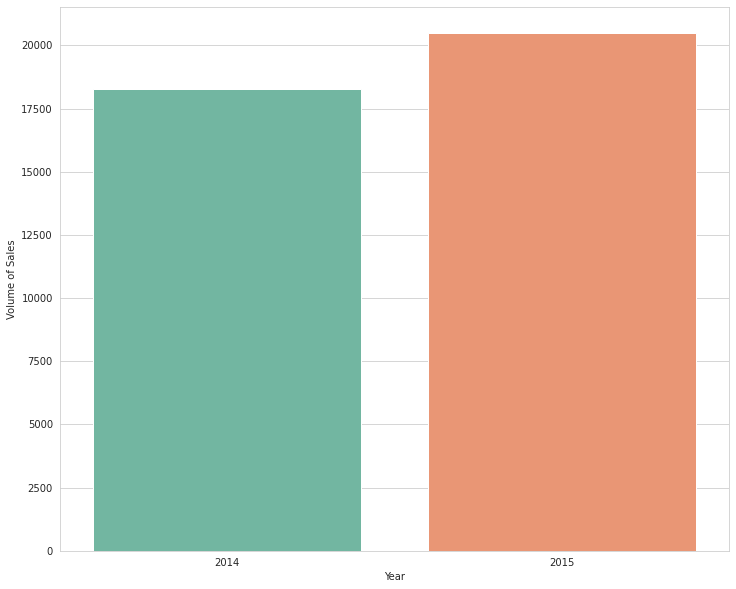

In [12]:
plt.figure(figsize=(12,10))
sns.set_style("whitegrid")
sns.countplot(my_data.Year,palette='Set2')
plt.ylabel("Volume of Sales")
plt.show()

In [13]:
filt = my_data["Year"] == 2015
my_data.loc[filt].count()

Member_number      20488
Date               20488
itemDescription    20488
Year               20488
Month              20488
Days of Week       20488
dtype: int64

There Were More Sales In 2015 Than There Were In 2014, So I Think Its Safe To Say That The Volumne of Sales Is Healthy And Growing 

# Question 3: Is The Number Of Customers Growing?

### Task 1: Finding The Number Of Unique Customers By The Year 

This is done using the member_number, so it works under the assumption that each member has a unique member_number

In [14]:
customers = my_data["Member_number"].unique()
years = my_data["Year"].unique()
num_of_customers = []


def no_of_customersfn(customers,year):
    uni = 0
    for member in customers:
        filt = (my_data["Member_number"] == member) & (my_data["Year"] == year)
        temp_df= my_data.loc[filt]
        temp_no = temp_df["Member_number"].nunique()
        if temp_no == 1:
            uni += 1
    return uni


for year in years:
    x=no_of_customersfn(customers, year)
    num_of_customers.append(x)
    
    

print(num_of_customers)
print(years)

#2014 is 3443
# 2015 is 3314

[3314, 3443]
[2015 2014]


### Task 2: Creating The Dataframe for The Plot

In [15]:
data = {'Years':  years,
        'No of Customers': num_of_customers
        }
nuniques_df = pd.DataFrame (data, columns = ['Years','No of Customers'])
nuniques_df

,Years,No of Customers
0,2015,3314
1,2014,3443


### Task 2: Plotting The Histogram

Text(0.5, 1.0, 'No of Unique Customers By Years')

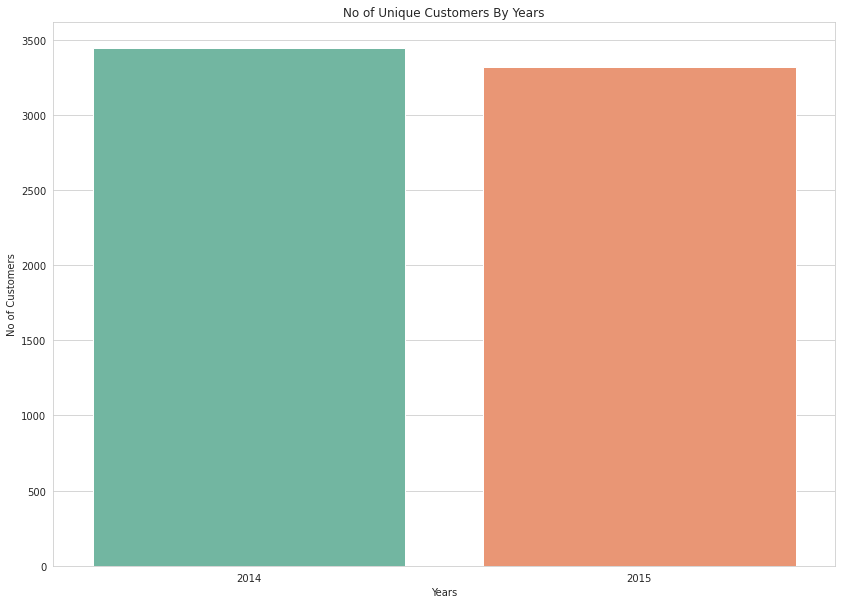

In [16]:
plt.figure(figsize=(14,10))
sns.set_style("whitegrid")
chart = sns.barplot(y=nuniques_df["No of Customers"], x=nuniques_df['Years'],palette='Set2', data=nuniques_df) # Your code here
plt.title("No of Unique Customers By Years")

Jugding by this histogram, it would appear that there were less customers in 2015 than in 2014 from the histogram before this we see that the volume of sales actually increased in 2015, There may be many reasons for this but one could be an increase in visitations by existing customers